In [21]:
#lessons I learned:
#https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file
#https://stackoverflow.com/questions/17098654/how-to-store-a-dataframe-using-pandas
#https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
#xhttps://realpython.com/python-f-strings/

In [116]:
import pandas as pd
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from functools import reduce


import matplotlib.pyplot as plt
import numpy as np

In [117]:
#load in our dataframe with movies from 1990s to 2019 using pickle
results = pd.read_pickle('results.pkl')

In [118]:
results.head()

,primaryTitle,startYear,genres,averageRating,numVotes,runtimeMinutes,titleType,region,titleId
12797,Kate & Leopold,2001,"Comedy,Fantasy,Romance",6.4,74330,118,movie,US,tt0035423
26357,"Wenn du groß bist, lieber Adam",1990,"Drama,Fantasy",6.9,23,78,movie,US,tt0059900
30878,The Other Side of the Wind,2018,Drama,6.9,4589,122,movie,US,tt0069049
36244,Me and the Kid,1993,"Comedy,Crime,Drama",5.3,211,94,movie,US,tt0081145
36467,Vincent and Me,1990,"Drama,Family,Fantasy",6.5,278,100,movie,US,tt0081721


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


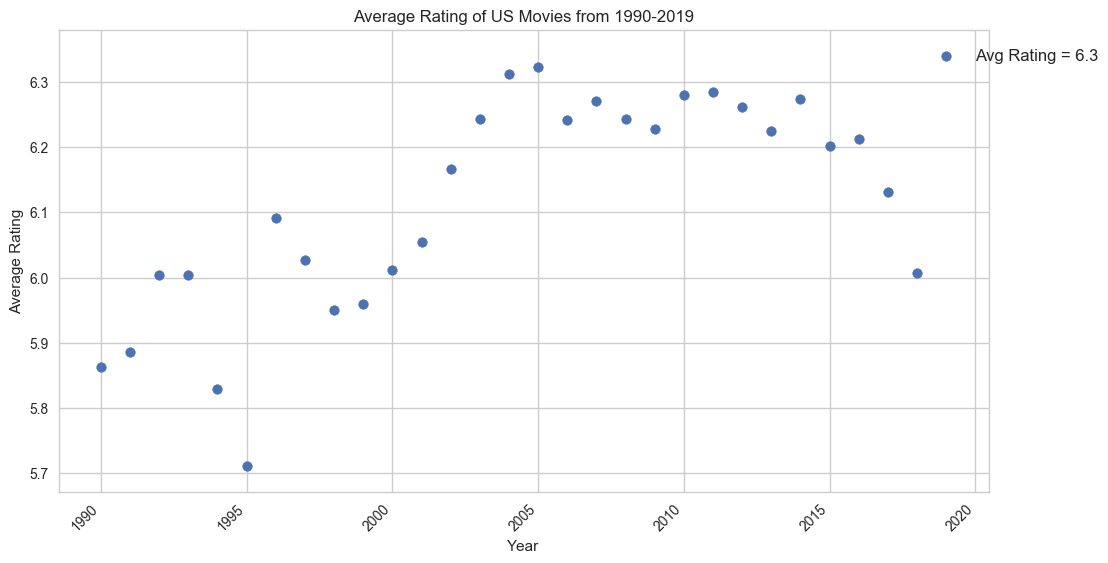

In [124]:
# Combined average rating of every move at every year
allyears_ratings = results.groupby('startYear', as_index=False)['averageRating'].mean() #as_index=True to output Series

# Choose style
print(plt.style.available)
plt.style.use('seaborn-whitegrid')

# Create fig,ax object and set scaffold
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title='Average Rating of US Movies from 1990-2019', xlabel = 'Year', ylabel = 'Average Rating')

# Format labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right', rotation=45,)

# annotate graph to label 'new companies'
thisyear_ratings = allyears_ratings[allyears_ratings['startYear']==2019]['averageRating']
# add average rating next to 2019 point,
ax.text(2020, thisyear_ratings, 'Avg Rating = %s'%(np.round(thisyear_ratings[29], 1)), fontsize=12, verticalalignment='center') #29 yrs since 1990

# Plot Graph
ax.scatter(allyears_ratings['startYear'], allyears_ratings['averageRating']);
